In [ ]:
# Notebook 4/4

# Imports

In [ ]:
# imports
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from wordcloud import WordCloud
import collections
from collections import Counter
from textblob import TextBlob

# cleaning
import nltk
nltk.download('wordnet')

# stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# lemmatization
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 

# vader sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# flair sentiment analysis
from flair.models import TextClassifier
from flair.data import Sentence

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# attention
import math
import transformers
from transformers import AutoTokenizer,AutoModelForQuestionAnswering

In [ ]:
# installations
!pip install transformers
!pip install flair
!pip install textblob
!pip install pycaret

In [ ]:
def get_version(name):
  ver = name.__version__
  print(ver, "", name)

import flair
import plotly
import sklearn
import textblob
import wordcloud

get_version(flair)
get_version(keras)
get_version(matplotlib)
get_version(nltk)
get_version(np)
get_version(pd)
get_version(plotly)
get_version(sklearn)
get_version(sns)
get_version(tf)
get_version(textblob)
get_version(transformers)
get_version(twint)
get_version(wordcloud)

0.10  <module 'flair' from '/usr/local/lib/python3.7/dist-packages/flair/__init__.py'>
2.8.0  <module 'tensorflow.keras' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/__init__.py'>
3.2.2  <module 'matplotlib' from '/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py'>
3.2.5  <module 'nltk' from '/usr/local/lib/python3.7/dist-packages/nltk/__init__.py'>
1.21.5  <module 'numpy' from '/usr/local/lib/python3.7/dist-packages/numpy/__init__.py'>
1.3.5  <module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>
5.5.0  <module 'plotly' from '/usr/local/lib/python3.7/dist-packages/plotly/__init__.py'>
0.23.2  <module 'sklearn' from '/usr/local/lib/python3.7/dist-packages/sklearn/__init__.py'>
0.11.2  <module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>
2.8.0  <module 'tensorflow.compat.v2' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/compat/v2/__init__.py'>
0.15.3  <module 'textblob' from '/u

In [ ]:
!nvidia-smi

Sat Feb 19 19:23:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# mbti_1_cleaned_all as final dataset
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/mbti/mbti_1_cleaned_all.csv")
data.head()

,text,label,IE,NS,TF,JP
0,intj moment play experience life repeat today ...,INFJ,I,N,F,J
1,find lack post alarm sex boring position often...,ENTP,E,N,T,P
2,good course say know absolutely positive good ...,INTP,I,N,T,P
3,dear rule arbitrary construct create dear entj...,INTJ,I,N,T,J
4,silly misconception approach logically go key ...,ENTJ,E,N,T,J


In [ ]:
# data = pd.read_csv("https://drive.google.com/uc?id=1NWGrm705AS3xOWrDFfETswf2saoPCkyu")

# MBTI Prediction Tool

In [ ]:
# extra runs using the same configurations on cnn multiclass model
# this is to allow an additional option for prediction

### CNN + Reddit Data: GloVe

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/mbti/submission datasets/3thousand_4axis.csv")
data.head()

,text,label,IE,NS,TF,JP,label_int,IE_int,NS_int,TF_int,JP_int
0,Hitman please! Favorite game is Persona 5,INFJ,introvert,intuition,feeling,judging,0,0,0,0,0
1,If there were a dedicated ARAM mode people wou...,INFJ,introvert,intuition,feeling,judging,0,0,0,0,0
2,"It's obscure game, but Starmade might be more ...",ENTP,extrovert,intuition,thinking,perceiving,1,1,0,1,1
3,I can't even count the reasons why it's comple...,INTP,introvert,intuition,thinking,perceiving,2,0,0,1,1
4,"Thanks for the tip. Please forgive me, I am st...",ENTJ,extrovert,intuition,thinking,judging,3,1,0,1,0


In [ ]:
data.label.value_counts()

INFJ    3000
ENTP    3000
INTP    3000
ENTJ    3000
INFP    3000
ENFJ    3000
INTJ    3000
ENFP    3000
ISTP    3000
ISFJ    3000
ESFP    3000
ESTP    3000
ISFP    3000
ESFJ    3000
ISTJ    3000
ESTJ    2812
Name: label, dtype: int64

In [ ]:
# cleaning

# lowercase for all text
data['text'] = data['text'].str.lower()

# remove urls
data['text'] = data['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

# remove punctuations
data['text'] = data['text'].str.replace('[^\w\s]','')

# remove digits
data['text'] = data['text'].apply(lambda x: re.sub(r"\d", '', x))

# stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# lemmatization
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda sentence:' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(sentence)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
wordcout = data
wordcout['wordcount'] = data['text'].apply(lambda x: len(str(x).split(' ')))
sequence_length = wordcout.wordcount.max() # max length

print(sequence_length)

873


In [ ]:
import urllib.request
import zipfile
import os

glovefile = 'glove.twitter.27B.100d.txt'

# download file if not in file directory
if not os.path.isfile(glovefile):
    urllib.request.urlretrieve('http://nlp.stanford.edu/data/glove.twitter.27B.zip',
                              'glove.twitter.27B.zip')
    with zipfile.ZipFile('glove.twitter.27B.zip', 'r') as zip_ref:
        zip_ref.extractall('')

    print('Download complete!')
    os.remove('glove.twitter.27B.zip')

# creating embeddings index
embeddings_index = {}

f = open(glovefile)
for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = vector

f.close()

print(len(embeddings_index)) # num of word vectors found

Download complete!
1193514


In [ ]:
max_features = 53000
tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>', filters=' ')
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
word_index = tokenizer.word_index
print(len(word_index)) # num of unique tokens

52549


In [ ]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

52550


In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((num_words, embedding_dim)) # fill with zeros

for word, i in word_index.items():
    if i > max_features:
        continue
    
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.random.randn(embedding_dim) # assign random vector

### CNN + Reddit Data: Model - deployed

In [ ]:
data = data[['text', 'label']]
data.head()

,text,label
0,hitman please favorite game persona,INFJ
1,dedicated aram mode people would stop playing ...,INFJ
2,obscure game starmade might alley actually fly...,ENTP
3,cant even count reason completely insane,INTP
4,thanks tip please forgive stupid,ENTJ


In [ ]:
X = pad_sequences(X, sequence_length) # pad sequences to the same len
y = pd.get_dummies(data['label']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Embedding Layer

In [ ]:
model = Sequential()
model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=sequence_length,
                    trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(rate=0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 881, 100)          5261800   
                                                                 
 conv1d_7 (Conv1D)           (None, 877, 128)          64128     
                                                                 
 global_max_pooling1d_7 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
299/299 [==============================] - 14s 43ms/step - loss: 2.7853 - accuracy: 0.0649 - val_loss: 2.7577 - val_accuracy: 0.0783
Epoch 2/20
299/299 [==============================] - 12s 42ms/step - loss: 2.7558 - accuracy: 0.0747 - val_loss: 2.7475 - val_accuracy: 0.0856
Epoch 3/20
299/299 [==============================] - 13s 43ms/step - loss: 2.7428 - accuracy: 0.0825 - val_loss: 2.7346 - val_accuracy: 0.0870
Epoch 4/20
299/299 [==============================] - 13s 43ms/step - loss: 2.7314 - accuracy: 0.0890 - val_loss: 2.7296 - val_accuracy: 0.0929
Epoch 5/20
299/299 [==============================] - 13s 42ms/step - loss: 2.7195 - accuracy: 0.0949 - val_loss: 2.7301 - val_accuracy: 0.0909
Epoch 6/20
299/299 [==============================] - 13s 42ms/step - loss: 2.7030 - accuracy: 0.1033 - val_loss: 2.7188 - val_accuracy: 0.0979
Epoch 7/20
299/299 [==============================] - 12s 41ms/step - loss: 2.6895 - accuracy: 0.1118 - val_loss: 2.7140 - val_accuracy:

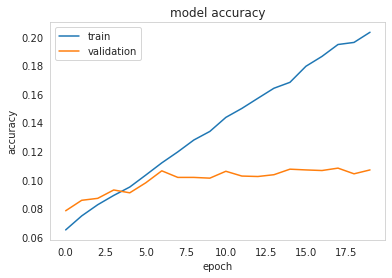

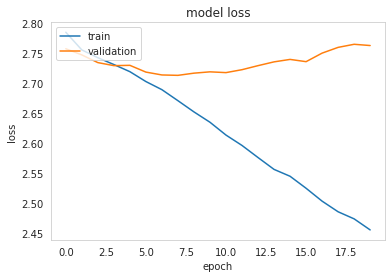

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_hat = model.predict(X_test)

from sklearn.metrics import classification_report
matrix = classification_report(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.09      0.13      0.11       609
           1       0.09      0.18      0.12       597
           2       0.10      0.08      0.09       598
           3       0.12      0.02      0.03       580
           4       0.11      0.22      0.14       603
           5       0.13      0.14      0.13       589
           6       0.33      0.33      0.33       542
           7       0.11      0.06      0.08       621
           8       0.07      0.07      0.07       597
           9       0.11      0.04      0.06       614
          10       0.07      0.11      0.08       599
          11       0.07      0.06      0.06       576
          12       0.10      0.10      0.10       629
          13       0.10      0.05      0.07       594
          14       0.09      0.08      0.08       618
          15       0.09      0.06      0.07       597

    accuracy                           0.11      9563


In [ ]:
accuracy_score(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))

0.10687022900763359

In [ ]:
model.save('model_reddit.h5')

In [ ]:
import pickle
# save tokenizer
with open('tokenizer_reddit.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### CNN + Reddit Data: Model - for testing

In [ ]:
# test run with confusion matrix

Embedding Layer

In [ ]:
model = Sequential()
model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=sequence_length,
                    trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(rate=0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 873, 100)          5255000   
                                                                 
 conv1d_2 (Conv1D)           (None, 869, 128)          64128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
299/299 [==============================] - 17s 49ms/step - loss: 2.7796 - accuracy: 0.0620 - val_loss: 2.7725 - val_accuracy: 0.0582
Epoch 2/20
299/299 [==============================] - 14s 48ms/step - loss: 2.7706 - accuracy: 0.0649 - val_loss: 2.7680 - val_accuracy: 0.0622
Epoch 3/20
299/299 [==============================] - 15s 51ms/step - loss: 2.7575 - accuracy: 0.0779 - val_loss: 2.7463 - val_accuracy: 0.0733
Epoch 4/20
299/299 [==============================] - 14s 48ms/step - loss: 2.7334 - accuracy: 0.0913 - val_loss: 2.7263 - val_accuracy: 0.0972
Epoch 5/20
299/299 [==============================] - 14s 48ms/step - loss: 2.7093 - accuracy: 0.1045 - val_loss: 2.7076 - val_accuracy: 0.1102
Epoch 6/20
299/299 [==============================] - 15s 49ms/step - loss: 2.6840 - accuracy: 0.1173 - val_loss: 2.6978 - val_accuracy: 0.1171
Epoch 7/20
299/299 [==============================] - 14s 48ms/step - loss: 2.6613 - accuracy: 0.1300 - val_loss: 2.6878 - val_accuracy:

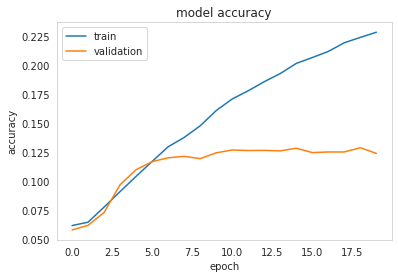

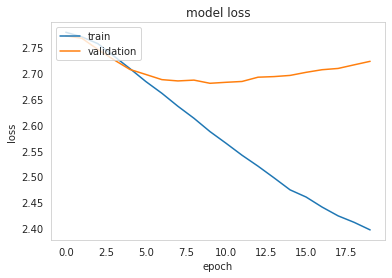

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_hat = model.predict(X_test)

from sklearn.metrics import classification_report
matrix = classification_report(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.11      0.13      0.12       602
           1       0.08      0.06      0.07       612
           2       0.10      0.13      0.11       577
           3       0.06      0.03      0.04       568
           4       0.14      0.18      0.16       637
           5       0.15      0.18      0.17       591
           6       0.40      0.35      0.37       553
           7       0.14      0.08      0.10       618
           8       0.08      0.04      0.05       616
           9       0.08      0.05      0.07       583
          10       0.10      0.19      0.13       608
          11       0.08      0.07      0.08       622
          12       0.11      0.12      0.12       592
          13       0.16      0.16      0.16       630
          14       0.09      0.15      0.11       554
          15       0.10      0.07      0.08       600

    accuracy                           0.12      9563


In [ ]:
accuracy_score(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))

0.12422879849419638

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
f1_score(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)), average='macro')

0.12159958727381837

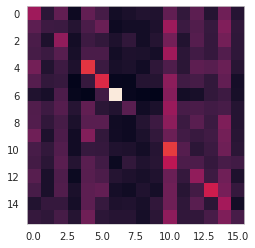

In [ ]:
conf = confusion_matrix(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))
plt.imshow(conf)

In [ ]:
model.save('model_reddit.h5')

In [ ]:
import pickle
# save tokenizer
with open('tokenizer_reddit.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### CNN + PersonalityCafe/Kaggle Data: GloVe Word Embedding Config

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/mbti/mbti_1_cleaned_all.csv")
data.head()

,text,label,IE,NS,TF,JP
0,intj moment play experience life repeat today ...,INFJ,I,N,F,J
1,find lack post alarm sex boring position often...,ENTP,E,N,T,P
2,good course say know absolutely positive good ...,INTP,I,N,T,P
3,dear rule arbitrary construct create dear entj...,INTJ,I,N,T,J
4,silly misconception approach logically go key ...,ENTJ,E,N,T,J


In [ ]:
data.label.value_counts()

INFP    1831
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: label, dtype: int64

In [ ]:
wordcout = data
wordcout['wordcount'] = data['text'].apply(lambda x: len(str(x).split(' ')))
sequence_length = wordcout.wordcount.max() # max length

print(sequence_length)

764


In [ ]:
import urllib.request
import zipfile
import os

glovefile = 'glove.twitter.27B.100d.txt'

# download file if not in file directory
if not os.path.isfile(glovefile):
    urllib.request.urlretrieve('http://nlp.stanford.edu/data/glove.twitter.27B.zip',
                              'glove.twitter.27B.zip')
    with zipfile.ZipFile('glove.twitter.27B.zip', 'r') as zip_ref:
        zip_ref.extractall('')

    print('Download complete!')
    os.remove('glove.twitter.27B.zip')

# creating embeddings index
embeddings_index = {}

f = open(glovefile)
for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = vector

f.close()

print(len(embeddings_index)) # num of word vectors found

Download complete!
1193514


In [ ]:
max_features = 54000
tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>', filters=' ')
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
word_index = tokenizer.word_index
print(len(word_index)) # num of unique tokens

53186


In [ ]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

53187


In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((num_words, embedding_dim)) # fill with zeros

for word, i in word_index.items():
    if i > max_features:
        continue
    
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.random.randn(embedding_dim) # assign random vector

### CNN + PersonalityCafe/Kaggle Data: Model - deployed

In [ ]:
data = data[['text', 'label']]
data.head()

,text,label
0,intj moment play experience life repeat today ...,INFJ
1,find lack post alarm sex boring position often...,ENTP
2,good course say know absolutely positive good ...,INTP
3,dear rule arbitrary construct create dear entj...,INTJ
4,silly misconception approach logically go key ...,ENTJ


In [ ]:
X = pad_sequences(X, sequence_length) # pad sequences to the same len
y = pd.get_dummies(data['label']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Embedding Layer

In [ ]:
model = Sequential()
model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=sequence_length,
                    trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(rate=0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 764, 100)          5318700   
                                                                 
 conv1d_1 (Conv1D)           (None, 760, 128)          64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
55/55 [==============================] - 5s 57ms/step - loss: 2.8113 - accuracy: 0.1613 - val_loss: 2.3446 - val_accuracy: 0.2150
Epoch 2/20
55/55 [==============================] - 3s 49ms/step - loss: 2.3967 - accuracy: 0.2118 - val_loss: 2.1402 - val_accuracy: 0.2772
Epoch 3/20
55/55 [==============================] - 3s 48ms/step - loss: 2.2119 - accuracy: 0.2564 - val_loss: 1.9971 - val_accuracy: 0.3187
Epoch 4/20
55/55 [==============================] - 3s 49ms/step - loss: 2.1120 - accuracy: 0.2871 - val_loss: 1.9304 - val_accuracy: 0.3602
Epoch 5/20
55/55 [==============================] - 3s 48ms/step - loss: 2.0046 - accuracy: 0.3411 - val_loss: 1.8660 - val_accuracy: 0.3954
Epoch 6/20
55/55 [==============================] - 3s 50ms/step - loss: 1.9210 - accuracy: 0.3663 - val_loss: 1.8311 - val_accuracy: 0.4179
Epoch 7/20
55/55 [==============================] - 3s 49ms/step - loss: 1.8571 - accuracy: 0.3913 - val_loss: 1.8209 - val_accuracy: 0.4248
Epoch 8/20
55

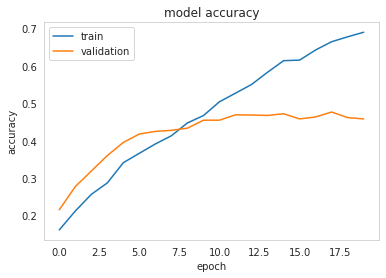

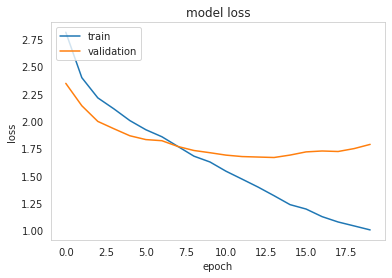

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_hat = model.predict(X_test)

from sklearn.metrics import classification_report
matrix = classification_report(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.55      0.42      0.48       139
           2       0.40      0.20      0.27        50
           3       0.48      0.67      0.56       119
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        19
           8       0.54      0.34      0.42       339
           9       0.44      0.58      0.50       361
          10       0.47      0.53      0.50       222
          11       0.40      0.56      0.47       263
          12       0.39      0.28      0.33        25
          13       0.30      0.41      0.34        44
          14       0.43      0.07      0.12        42
          15       0.57      0.52      0.54        60

    accuracy                           0.46      1735


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))

0.45821325648414984

In [ ]:
model.save('model_kaggle.h5')

In [ ]:
import pickle
# save tokenizer
with open('tokenizer_kaggle.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### CNN + PersonalityCafe/Kaggle Data: Model - for testing

In [ ]:
# test run with confusion matrix

Embedding Layer

In [ ]:
model = Sequential()
model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=sequence_length,
                    trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(rate=0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 764, 100)          5318700   
                                                                 
 conv1d (Conv1D)             (None, 760, 128)          64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
55/55 [==============================] - 18s 71ms/step - loss: 2.5803 - accuracy: 0.1814 - val_loss: 2.3310 - val_accuracy: 0.2127
Epoch 2/20
55/55 [==============================] - 3s 56ms/step - loss: 2.3265 - accuracy: 0.2163 - val_loss: 2.1990 - val_accuracy: 0.2484
Epoch 3/20
55/55 [==============================] - 3s 58ms/step - loss: 2.2041 - accuracy: 0.2496 - val_loss: 2.1061 - val_accuracy: 0.3095
Epoch 4/20
55/55 [==============================] - 3s 58ms/step - loss: 2.1144 - accuracy: 0.2761 - val_loss: 2.0491 - val_accuracy: 0.3072
Epoch 5/20
55/55 [==============================] - 3s 57ms/step - loss: 2.0376 - accuracy: 0.3013 - val_loss: 2.0046 - val_accuracy: 0.3337
Epoch 6/20
55/55 [==============================] - 3s 56ms/step - loss: 1.9609 - accuracy: 0.3355 - val_loss: 1.9472 - val_accuracy: 0.3568
Epoch 7/20
55/55 [==============================] - 3s 57ms/step - loss: 1.8695 - accuracy: 0.3750 - val_loss: 1.8896 - val_accuracy: 0.3850
Epoch 8/20
5

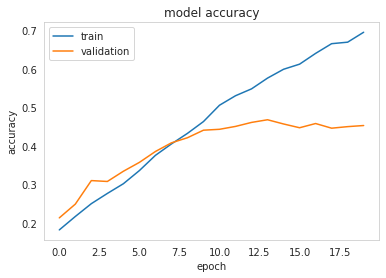

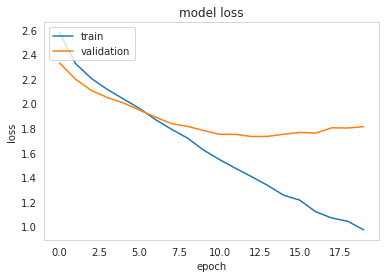

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_hat = model.predict(X_test)

from sklearn.metrics import classification_report
matrix = classification_report(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        39
           1       0.41      0.46      0.44       138
           2       0.53      0.34      0.41        50
           3       0.47      0.65      0.55       136
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        19
           8       0.38      0.47      0.42       262
           9       0.51      0.54      0.53       368
          10       0.50      0.48      0.49       229
          11       0.41      0.46      0.43       253
          12       0.44      0.25      0.32        44
          13       0.47      0.47      0.47        58
          14       0.00      0.00      0.00        53
          15       0.55      0.41      0.47        58

    accuracy                           0.45      1735


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))

0.45244956772334294

In [ ]:
f1_score(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)), average='macro')

0.28887751742986156

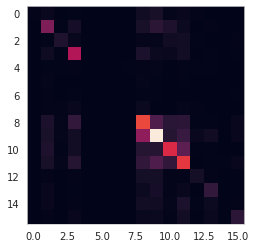

In [ ]:
conf = confusion_matrix(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))
plt.imshow(conf)

# Crawling Tweets to Test

In [ ]:
!pip3 uninstall twint
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
import twint
twint.__version__

'2.1.21'

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()

c = twint.Config()
c.Limit = 3000
c.Lang = "en"
c.Store_csv = True
c.Search = "food"
c.Output = "food.csv"
twint.run.Search(c)

1495271521517916166 2022-02-20 05:38:06 +0000 <BoogieShmooo> @ChrisNeuen @nofish_nonuts @life_is_art___ I used to use over the counter meds. Had to see a neurologist for my migraines. Given a trigger list of foods, environmental factors. I know my triggers now. Some u can’t avoid but when I get one I take  Excedrin migraine. Hugs and love ❤️ hope u feel better
1495271517218824196 2022-02-20 05:38:05 +0000 <stripesfensky> this one’s called: “why do they call it oven when you of in the cold food of out hot eat the food” (ft. disko and @ovenotter)  https://t.co/dQZWdN49KN
1495271507634929667 2022-02-20 05:38:02 +0000 <EatEmpathy__95> The food I made was tastier than I expected 🤤; I gobbled it up too fast to take a pic 📸
1495271503419838465 2022-02-20 05:38:01 +0000 <bang_nuno> @cat5ims @bukanliaitzyy @FOOD_FESS Coba ikhtiar ke pendeta dulu kak. Atau bisa minta tolong ke saudara/tetangga yg muslim boleh kok kak.. Kalau ada yg bilang gak bolehin bilang saya 🙂 biasa cuma dirukyah pakai alfat

In [ ]:
import pandas as pd
food_df = pd.read_csv("/content/food.csv")
food_df = food_df[food_df['language'] == 'en']
food_df = food_df[food_df['tweet'].notna()]
food_df = food_df.drop_duplicates()
food_df = food_df[['tweet']]
food_df = food_df.rename(columns={'tweet': 'text'})
food_df.head()

,text
0,Recipe of the day: Creamy Parmesan Baked Acorn...
2,This restaurants service felt very much racist...
3,Food pics and ambience is captured as well #go...
4,@KTLA @lapublichealth why do you guys keep ra...
5,What a performance 🎿 😤 🇺🇸 Diggins says she fou...


In [ ]:
import re

# cleaning: lowercase, remove urls, punctuations, digits
food_df['text'] = food_df['text'].str.lower()
food_df['text'] = food_df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
food_df['text'] = food_df['text'].str.replace('[^\w\s]','')
food_df['text'] = food_df['text'].apply(lambda x: re.sub(r"\d", '', x))

food_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,text
0,recipe of the day creamy parmesan baked acorn ...
2,this restaurants service felt very much racist...
3,food pics and ambience is captured as well goo...
4,ktla lapublichealth why do you guys keep raid...
5,what a performance diggins says she fought ...


In [ ]:
food_df.count()

text    3982
dtype: int64

PersonalityCafe Model

In [ ]:
from tensorflow import keras
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
model = keras.models.load_model('/content/model_kaggle.h5')

max_sentence_length = 764

class_names = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

with open("/content/tokenizer_kaggle.pickle", 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
    loaded_tokenizer.fit_on_texts(food_df['text'].values)

X = loaded_tokenizer.texts_to_sequences(food_df['text'].values)
padded = sequence.pad_sequences(X, maxlen=max_sentence_length)
pred = model.predict(padded)
pred

array([[1.57043035e-03, 2.93287467e-02, 1.66745274e-04, ...,
        1.07061875e-03, 1.74006345e-04, 1.26927707e-05],
       [2.85191517e-02, 3.90190370e-02, 7.85729885e-02, ...,
        2.86772940e-02, 4.22529876e-02, 5.25919572e-02],
       [3.29951867e-02, 4.47157770e-02, 4.49764170e-02, ...,
        7.63018727e-02, 5.09004891e-02, 6.34199902e-02],
       ...,
       [2.32443362e-02, 1.70245338e-02, 1.36568081e-02, ...,
        1.98828075e-02, 2.10373085e-02, 5.15274890e-02],
       [2.19504237e-02, 1.56371102e-01, 4.92056198e-02, ...,
        8.55934247e-03, 1.04792556e-02, 1.75246634e-02],
       [1.16777485e-02, 6.38648774e-03, 1.76677220e-02, ...,
        5.25979558e-03, 2.52498128e-02, 2.48054899e-02]], dtype=float32)

In [ ]:
import numpy as np
prediction = []

for i in range(len(pred)):
  prediction.append(str(format(class_names[np.argmax(pred[i])])))

food_df['prediction_pcafe'] = prediction
food_df.head()

,text,prediction_pcafe
0,recipe of the day creamy parmesan baked acorn ...,INFP
2,this restaurants service felt very much racist...,INTJ
3,food pics and ambience is captured as well goo...,INTJ
4,ktla lapublichealth why do you guys keep raid...,INFP
5,what a performance diggins says she fought ...,INFP


In [ ]:
food_df.prediction_pcafe.value_counts()

INFP    1637
INTP     785
ENFP     520
INFJ     478
INTJ     451
ENTP      48
ISTP      32
ENTJ      12
ISTJ      11
ISFJ       5
ISFP       3
Name: prediction_pcafe, dtype: int64

Reddit Model

In [ ]:
from tensorflow import keras
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
model = keras.models.load_model('/content/model_reddit.h5')

max_sentence_length = 881

class_names = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

with open("/content/tokenizer_reddit.pickle", 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
    loaded_tokenizer.fit_on_texts(food_df['text'].values)

X = loaded_tokenizer.texts_to_sequences(food_df['text'].values)
padded = sequence.pad_sequences(X, maxlen=max_sentence_length)
pred = model.predict(padded)
pred

array([[0.02274996, 0.07907272, 0.13941377, ..., 0.01883212, 0.01541294,
        0.10408188],
       [0.08405741, 0.07386927, 0.05726868, ..., 0.05421275, 0.0633639 ,
        0.05754169],
       [0.06474929, 0.06704251, 0.07380392, ..., 0.0421185 , 0.06986813,
        0.0646002 ],
       ...,
       [0.04605455, 0.10839682, 0.06613568, ..., 0.06121569, 0.0713833 ,
        0.05959007],
       [0.07104966, 0.07628417, 0.06279011, ..., 0.04071771, 0.07068021,
        0.05010611],
       [0.06712274, 0.09924201, 0.05675005, ..., 0.07119285, 0.07343302,
        0.05104184]], dtype=float32)

In [ ]:
import numpy as np
prediction = []

for i in range(len(pred)):
  prediction.append(str(format(class_names[np.argmax(pred[i])])))

food_df['prediction_reddit'] = prediction
food_df.head()

,text,prediction_pcafe,prediction_reddit
0,recipe of the day creamy parmesan baked acorn ...,INFP,INTJ
2,this restaurants service felt very much racist...,INTJ,ENFJ
3,food pics and ambience is captured as well goo...,INTJ,ESFJ
4,ktla lapublichealth why do you guys keep raid...,INFP,ENFP
5,what a performance diggins says she fought ...,INFP,ENTP


In [ ]:
food_df.prediction_reddit.value_counts()

ENTJ    1183
INTJ     657
ENFP     519
INFJ     370
INTP     218
ESFP     160
ESFJ     155
ENFJ     151
ISTJ     133
INFP     100
ESTJ      83
ISFJ      72
ISTP      70
ESTP      54
ISFP      45
ENTP      12
Name: prediction_reddit, dtype: int64

In [ ]:
food_df.to_csv('tweets_processed.csv', index=False)

In [ ]:
compare = np.where(food_df["prediction_pcafe"] == food_df["prediction_reddit"], "Same", "Different")
food_df["check"] = compare
food_df["check"].value_counts()

Different    3787
Same          195
Name: check, dtype: int64

In [ ]:
print((195/(3787+195))*100, "%")

4.897036664992466 %
